<a id='top'></a>
# План проекта:
### <a href='#Step_1'>Шаг 1. Импорт файла с данными и изучение общей информации</a>
#### <a href='#Step_1_conclusion'>Вывод</a>

### <a href='#Step_2'>Шаг 2. Подготовка данных</a>

#### <a href='#Step_2_1'>2.1 Переработка данных</a>
##### <a href='#Step_2_1_1'>2.1.1 Изменение типов данных</a>
##### <a href='#Step_2_1_2'>2.1.2 Исправление ошибок в данных</a>
#### <a href='#Step_2_1_conclusion'>Вывод</a>

#### <a href='#Step_2_2'>2.2 Посчитайте для каждого пользователя:</a>
##### <a href='#Step_2_2_1'>2.2.1 количество сделанных звонков и израсходованных минут разговора по месяцам</a>
##### <a href='#Step_2_2_2'>2.2.2 количество отправленных сообщений по месяцам</a>
##### <a href='#Step_2_2_3'>2.2.3 объем израсходованного интернет-трафика по месяцам</a>
##### <a href='#Step_2_2_3'>2.2.4 помесячную выручку с каждого пользователя</a>
#### <a href='#Step_2_2_conclusion'>Вывод</a>

### <a href='#Step_3'>Шаг 3. Анализ данных</a>
#### <a href='#Step_3_1'>3.1 Исследование времени разговоров</a>
#### <a href='#Step_3_2'>3.2 Исследование количества сообщений</a>
#### <a href='#Step_3_3'>3.3 Исследование трафика</a>
#### <a href='#Step_3_1_conclusion'>Вывод</a>

### <a href='#Step_4'>Шаг 4. Проверка гипотез</a>
#### <a href='#Step_4_1'>4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a>
#### <a href='#Step_4_2'>4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a>
#### <a href='#Step_4_conclusion'>4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a>
### <a href='#Step_5'>Общий вывод</a>

<a id='Step_1'></a>
### Шаг 1. Импорт файлов с данными и изучение общей информации

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#Импортируем файлы данных
calls = pd.read_csv('/datasets/calls.csv', sep=',')
calls.info()
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
180105,1450_123,2018-10-23,9.68,1450
43977,1110_259,2018-08-30,8.98,1110
140334,1358_96,2018-03-26,6.66,1358
43145,1109_120,2018-11-03,9.61,1109
17927,1049_282,2018-09-27,1.25,1049
52686,1132_279,2018-10-24,18.56,1132
27508,1067_418,2018-06-02,7.15,1067
50637,1126_200,2018-09-23,3.93,1126
40224,1099_597,2018-04-04,8.59,1099
9215,1024_246,2018-11-12,4.85,1024


In [3]:
internet = pd.read_csv('/datasets/internet.csv', sep=',', index_col=0)
internet.info()
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
56676,1189_115,404.41,2018-07-02,1189
34990,1121_348,277.98,2018-08-30,1121
133387,1446_170,534.81,2018-09-02,1446
39780,1139_35,76.31,2018-12-15,1139
7350,1025_242,27.65,2018-10-26,1025
44565,1154_123,0.00,2018-10-12,1154
7488,1025_380,0.00,2018-05-30,1025
140277,1471_160,253.39,2018-05-05,1471
53865,1180_356,639.50,2018-05-07,1180
83980,1284_334,352.82,2018-05-27,1284


In [4]:
messages = pd.read_csv('/datasets/messages.csv', sep=',')
messages.info()
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
60029,1264_87,2018-05-07,1264
90648,1375_448,2018-12-25,1375
43397,1187_150,2018-09-18,1187
102415,1417_277,2018-11-03,1417
116751,1474_137,2018-12-23,1474
95642,1393_216,2018-09-11,1393
75115,1318_144,2018-10-03,1318
87431,1364_165,2018-08-30,1364
114222,1465_114,2018-12-16,1465
69140,1295_234,2018-11-18,1295


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
users = pd.read_csv('/datasets/users.csv', sep=',')
users.info()
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
120,1120,25,NaN,Краснодар,Агнесса,Абдулина,2018-01-24,ultra
181,1181,37,NaN,Омск,Рем,Аврорин,2018-11-23,smart
379,1379,39,NaN,Москва,Нелли,Кочергина,2018-08-09,ultra
22,1022,72,NaN,Санкт-Петербург,Василиса,Трофимова,2018-12-01,smart
187,1187,60,NaN,Рязань,Виталий,Овчинников,2018-08-22,smart
27,1027,62,NaN,Петрозаводск,Владислав,Авдеев,2018-04-10,smart
117,1117,42,NaN,Тюмень,Дана,Меркулова,2018-12-10,smart
412,1412,63,NaN,Волгоград,Геодар,Афонин,2018-06-05,ultra
83,1083,24,NaN,Сочи,Рустэм,Галкин,2018-04-24,smart
137,1137,64,NaN,Кемерово,Ким,Артёшин,2018-12-02,smart


<a id='Step_1_conclusion'></a>
### Вывод:
- calls - более 39000 строк со временем звонка 0. Предположительно, это значение появляется, когда абонент не дозвонился. По условиям обоих тарифов такие звонки не тарифицируются. Удалим эти строки.
- tariffs - изменим название столбца tariff_name на tariff. Потребуется для объединения таблиц
- во всех датафреймах даты в формате object заменим на datetime

<a id='Step_2'></a>
### Шаг 2. Подготовка данных

<a id='Step_2_1'></a>
### 2.1 Переработка данных

<a id='Step_2_1_1'></a>
#### 2.1.1 Изменение типов данных

In [7]:
#список датафреймов, в которых нужно поменять тип данных на datetime
date_df = [calls, internet, messages, users]

In [8]:
#функция меняет тип данных на datetime
def change_to_datetime (df):
    for column in df.columns:
        if 'date' in column:
            df[column] = pd.to_datetime(df[column], format = '%Y-%m-%d')
    return df

In [9]:
#выполним функцию и проверим результат
for dataframe in date_df:
    dataframe = change_to_datetime(dataframe)
    print()
    dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+

<a id='Step_2_1_2'></a>
#### 2.1.2 Исправление ошибок в данных

In [10]:
#удалим 0 значения в датафрейме calls
calls = calls.query('duration > 0').reset_index(drop=True)

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [14]:
#Переименуем название столбца tariff_name на tariff в датафрейме tariffs
tariffs = tariffs.rename(columns={
    'messages_included': 'messages_included',
    'mb_per_month_included': 'mb_per_month_included',
    'minutes_included': 'minutes_included',
    'rub_monthly_fee': 'rub_monthly_fee',
    'rub_per_gb': 'rub_per_gb',
    'rub_per_message': 'rub_per_message',
    'rub_per_minute': 'rub_per_minute',
    'tariff_name': 'tariff'
    })

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


<a id='#Step_2_1_conclusion'></a>
### Вывод:
- В столбцах, содеращих информацию о датах, тип данных изменен на datetime. Необходимо для извлечения информации о месяце совершения операции
- В датафрейме calls удалены звонки, продолжительностью 0 минут. Такие звонки не тарифицируются.
- В датафрейме calls удален столбец Unnamed: 0. Информация в столбце дублирует индексы датафрейма.
- В датафрейме tariffs изменено название столбца tariff_name на tariff. Необходимо для объединения датафреймов.
- В датафрейме users churn_date пропуски заполнять не будем. Столбец в дальнейшем исследовании не задействован. 

<a id='Step_2_2'></a>
### 2.2 Посчитайте для каждого пользователя:

<a id='Step_2_2_1'></a>
### 2.2.1 количество сделанных звонков и израсходованных минут разговора по месяцам

In [16]:
#По условиям тарифа время разговора округляется в большу сторону
calls['duration'] = np.ceil(calls['duration'])

In [17]:
#Извлечем из столбца информацию о месяце, когда был совершен звонок
calls['month'] = calls['call_date'].dt.month

In [18]:
#Сгруппируем данные по столбцам 'user_id', 'month', посчитаем время разговоров в месяц и их количество
calls_gb = calls.groupby(['user_id', 'month']).agg({'duration': 'sum', 'id': 'count'})

In [19]:
#Переименуем столбцы для большей информативности
calls_gb = calls_gb.rename(columns={
    'user_id': 'user_id',
    'month': 'month',
    'duration': 'minutes',
    'id': 'calls_count'
    }) 

<a id='Step_2_2_2'></a>
### 2.2.2 количество отправленных сообщений по месяцам

In [20]:
#Извлечем из столбца информацию о месяце, когда было отправлено сообщение
messages['month'] = messages['message_date'].dt.month

In [21]:
#Сгруппируем данные по столбцам 'user_id', 'month', посчитаем количество сообщений в месяц
messages_gb = messages.groupby(['user_id', 'month']).agg({'id': 'count'})

In [22]:
#Переименуем столбцы для большей информативности
messages_gb = messages_gb.rename(columns={
    'user_id': 'user_id',
    'month': 'month',
    'id': 'messages'
    }) 

<a id='Step_2_2_3'></a>
### 2.2.3 объем израсходованного интернет-трафика по месяцам

In [23]:
#По условиям тарифа трафик округляется в большую сторону
internet['mb_used'] = np.ceil(internet['mb_used'])

In [24]:
#Извлечем из столбца информацию о месяце, в котором была сделана запись о истраченном трафике
internet['month'] = internet['session_date'].dt.month

In [25]:
#Сгруппируем данные по столбцам 'user_id', 'month', посчитаем количество мегабайт потраченных в месяц
internet_gb = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

<a id='Step_2_2_4'></a>
### 2.2.4 помесячную выручку с каждого пользователя

In [26]:
#Объединим датафреймы calls, internet, messages
mobile_data = calls_gb.merge(
    internet_gb, on=['user_id', 'month'], how='outer').merge(
    messages_gb, on=['user_id', 'month'], how='outer')

In [27]:
#Сбросим индекс во избежание ошибок при дальнейшем объединении
mobile_data = mobile_data.reset_index()

In [28]:
#Объединим датафрейм mobile_data с датафреймами users и tariffs 
data = mobile_data.merge(
    users, on='user_id', how='left').merge(
    tariffs, on='tariff', how='left')

In [29]:
#Чтобы корректно посчитать выручку с каждого пользователя, нам необходимо убедиться, 
#чтобы в столбцах 'minutes', 'messages', 'mb_used' не было пропусков, заменим на 0
values = {'minutes': 0, 'messages': 0, 'mb_used': 0}
data = data.fillna(value = values)

In [30]:
#Функция расчитывает сумму расходов по каждому пользователю в месяц
def total_spend (row):
    minutes = row['minutes']
    mb_used = row['mb_used']
    messages = row['messages']
    minutes_included = row['minutes_included']
    mb_per_month_included = row['mb_per_month_included']
    messages_included = row['messages_included']
    rub_monthly_fee = row['rub_monthly_fee']
    rub_per_minute = row['rub_per_minute']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    total_spend = rub_monthly_fee
    if minutes > minutes_included:
        total_spend += (minutes - minutes_included)*rub_per_minute
    if mb_used > mb_per_month_included:
        total_spend += np.ceil(((mb_used - mb_per_month_included)/1000)*rub_per_gb)
    if messages > messages_included:
        total_spend += (messages - messages_included)*rub_per_message
    return total_spend     

In [31]:
#Создадим новый столбец, применим формулу
data['total_spend'] = data.apply(total_spend, axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
minutes                  3214 non-null float64
calls_count              3168 non-null float64
mb_used                  3214 non-null float64
messages                 3214 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

<a id='Step_2_2_conclusion'></a>
### Вывод:
<p>1. Произведен расчет следующих метрик для каждого пользователя:</p>
- суммарное время разговоров в месяц
- суммарное количество сообщений в месяц
- суммарный трафик в месяц
- стоимость услуг в месяц
<p>2. Для дальнейшего исследования для нас важно, чтобы в столбцах 'minutes', 'messages', 'mb_used' не было пропусков. Пропуски заменили на 0</p>

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_3'></a>
### Шаг 3. Анализ данных:

In [33]:
#Подготовим необходимые срезы данных:
#Срез по тарифу smart
smart_data=data.query('tariff=="smart"')

In [34]:
#Срез по тарифу ultra
ultra_data=data.query('tariff=="ultra"')

In [35]:
#Срез по Москве
moscow_data = data.query('city=="Москва"')

In [36]:
#Срез по регионам
region_data = data.query('city!="Москва"')

In [37]:
#функция автоматизирует вывод необходимых статистик и построение графиков
def display_statistics (column):
    statistics = round(
        data.groupby('tariff')[column].agg(
        [np.mean, lambda x: np.std(x, ddof=1), lambda y: np.var(y, ddof=1)])
    )
    statistics.columns = ['mean', 'std', 'var']
    
    smart_data[column].hist(figsize=(10,8))
    plt.xlabel('Тариф Smart')
    plt.show()
    
    ultra_data[column].hist(figsize=(10,8))
    plt.xlabel('Тариф Ultra')
    plt.show()
    print()
    print(statistics)

<a id='Step_3_1'></a>
### 3.1 Исследование времени разговоров

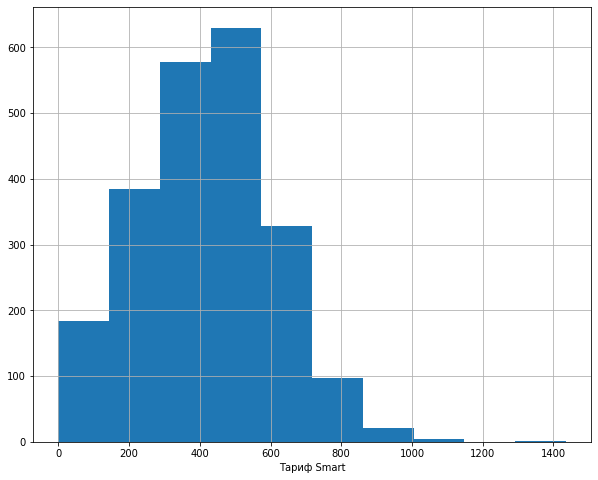

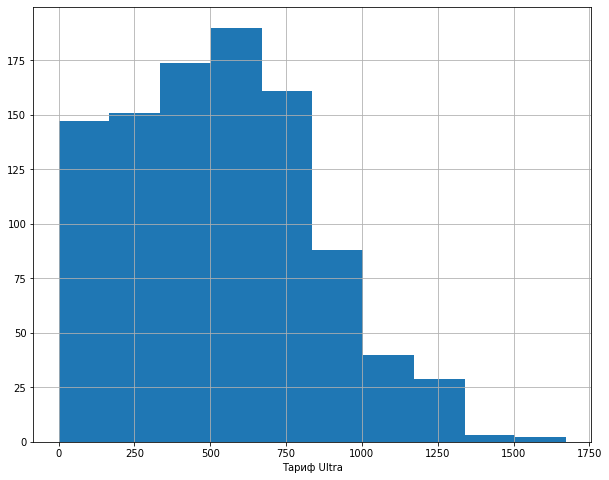


         mean    std       var
tariff                        
smart   418.0  190.0   36219.0
ultra   527.0  318.0  100874.0


In [38]:
#Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
display_statistics ('minutes')

<a id='Step_3_2'></a>
### 3.2 Исследование количества сообщений

In [39]:
#Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

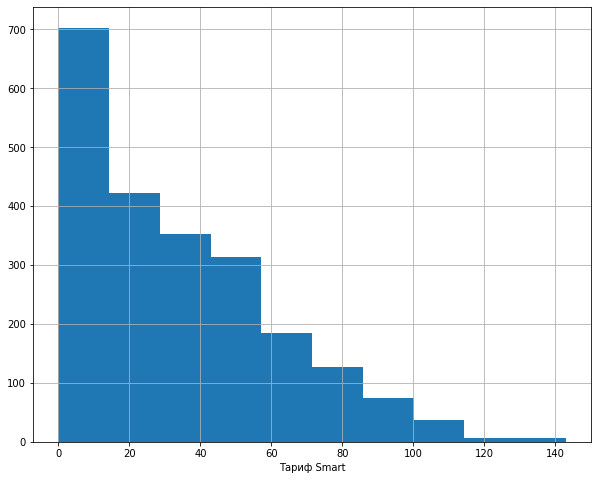

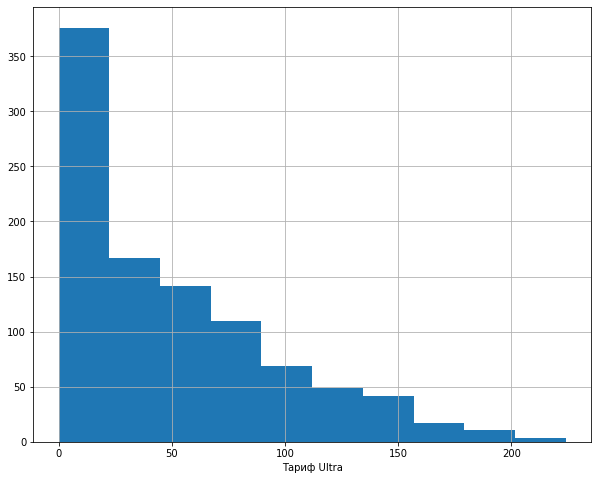


        mean   std     var
tariff                    
smart   33.0  28.0   797.0
ultra   49.0  48.0  2285.0


In [40]:
display_statistics ('messages')

<a id='Step_3_3'></a>
### 3.3 Исследование трафика

In [41]:
#Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

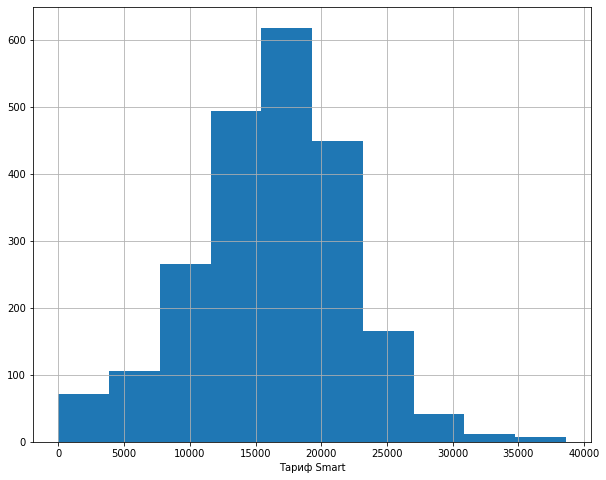

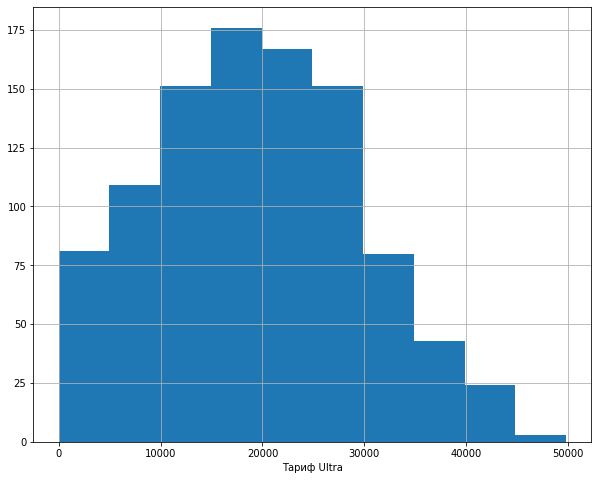


           mean      std          var
tariff                               
smart   16229.0   5878.0   34545911.0
ultra   19487.0  10096.0  101935621.0


In [42]:
display_statistics ('mb_used')

<a id='Step_3_conclusion'></a>
### Вывод:
#### Исследование времени разговоров:
- Гистограммы скошенны вправо
- Пользователям тарифа Smart в среднем необходимо 418 минут в месяц, что укладывается в лимиты тарифа
- Пользователям тарифа Ultra в среднем необходимо 527 минут в месяц, что укладывается в лимиты тарифа
#### Исследование количества сообщений:
- Гистограммы скошенны вправо
- Пользователям тарифа Smart в среднем необходимо 33 сообщений в месяц, что укладывается в лимиты тарифа
- Пользователям тарифа Ultra в среднем необходимо 49 сообщение в месяц, что укладывается в лимиты тарифа
#### Исследование трафика:
- Гистограммы скошенны вправо
- Пользователям тарифа Smart в среднем необходимо 16229 мегабайт в месяц, что не укладывается в лимиты тарифа
- Пользователям тарифа Ultra в среднем необходимо 19487 мегабайт в месяц, что укладывается в лимиты тарифа
- Пользователеи тарифа Smart вынуждены доплачивать за дополнительный трафик

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_4'></a>
### Шаг 4. Проверка гипотез:

<a id='Step_4_1'></a>
### 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [43]:
#выборка по тарифу smart
total_spend_ultra = ultra_data['total_spend']

In [44]:
#выборка по тарифу smart
total_spend_smart = smart_data['total_spend']

#### Нулевая гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна

In [45]:
alpha = 0.05 

results = st.ttest_ind(
    total_spend_ultra,
    total_spend_smart)    
    
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.557718794845351e-180
Отвергаем нулевую гипотезу


<p>Мы отвергли гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна". Исследуем, какой тариф приносит больше выручки:</p>

In [46]:
revenue_by_tariff = round(data.groupby('tariff').agg({'total_spend': ['sum', 'count']}))
revenue_by_tariff.columns = ['sum', 'count']
revenue_by_tariff['sum_per_user'] = round(revenue_by_tariff['sum']/revenue_by_tariff['count'])
revenue_by_tariff

,sum,count,sum_per_user
tariff,,,
smart,2778629.0,2229,1247.0
ultra,2032298.0,985,2063.0


<a id='Step_4_2'></a>
### 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [47]:
#выборка по Москве
total_spend_moscow = moscow_data['total_spend']

In [48]:
#Выборка по регионам
total_spend_region = region_data['total_spend']

#### Нулевая гипотеза: Средняя выручка пользователей из Москвы и регионов равна

In [49]:
alpha = 0.05 

results = st.ttest_ind(
    total_spend_moscow,
    total_spend_region)    
    
    
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5063671397731617
Не получилось отвергнуть нулевую гипотезу


<a id='Step_4_conclusion'></a>
### Вывод:
<p>Нулевая гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна" отвергнута. Один из тарифов приносит больше выручки, чем другой.</p>
<p>Нулевая гипотеза: "Нулевая гипотеза: Средняя выручка пользователей из Москвы и регионов равна" не может быть отвергнута. Есть вероятность того, что в Москве и в регионах пользователи тратят на мобильную связь одинаково.</p>

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_5'></a>
### Шаг 4. Общий вывод

<p>Мы отвергли гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна". Больше выручки приносит более дешевый Smart за счет количества пользователей, но при этом пользователи тарифа ultra в среднем тратят на услуги связи больше.<p/>
<p>Пользователи обоих тарифов в среднем укладываются в пакеты минут и сообщений, включенных в тарифы.<p/>
<p>Пользователям тарифа Smart в среднем не хватает трафика включенного в тариф. При этом пользователи тарифа Ultra в среднем укладываются во включенный трафик.<p/>
<p>Мы не отвергли гипотезу Средняя выручка пользователей из Москвы и регионов равна". Это может говорить о том, что поведение пользователей в регионах и в Москве не сильно различается, что выражается в тратах на мобильную связь<p/>
<p>Было бы полезным отдельно исследовать сколько тратят пользователи каждого тарифа сверх абонентской платы.<p/>

**<a href='#top'>Вернуться в начало</a>**